<a href="https://colab.research.google.com/github/guptaprateek98/capstone_bike_sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(prateek).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [170]:
#importing important libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [171]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
# loading dataset by defining its path
ds = pd.read_csv('/content/drive/MyDrive/capstone for bike sharing/SeoulBikeData.csv',encoding='ISO-8859-1')

#Looking into dataset

In [173]:
ds.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [174]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [175]:
ds.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [176]:
ds.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#Checking for duplicacy

In [177]:
len(ds[ds.duplicated()])

0

In [178]:
#checking for null values
ds.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#Feature engineering part-1

In [179]:
from datetime import datetime


In [180]:
ds['Date']=ds['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

In [181]:
ds['month'] = ds['Date'].apply(lambda x : x.month)
ds['day_of_week'] = ds['Date'].dt.day_name()
ds['weekdays_weekend']=ds['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
ds=ds.drop(columns=['Date','day_of_week'],axis=1)

In [182]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

##PERFORMING EDA

###Univariate analysis

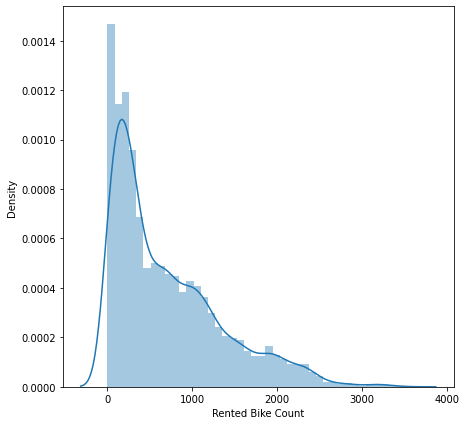

In [183]:
#looking into target variable
plt.figure(figsize=(7,7))
sns.distplot(ds['Rented Bike Count'])

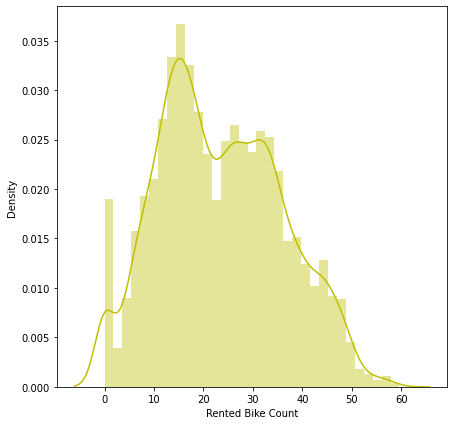

In [184]:
#sqrt transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(ds['Rented Bike Count']),color="y")

* After doing sqrt of Rented Bike Count, it's appearing  normally distributed.

#Visual analysis of numeric features

In [185]:
numeric_features = ds.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

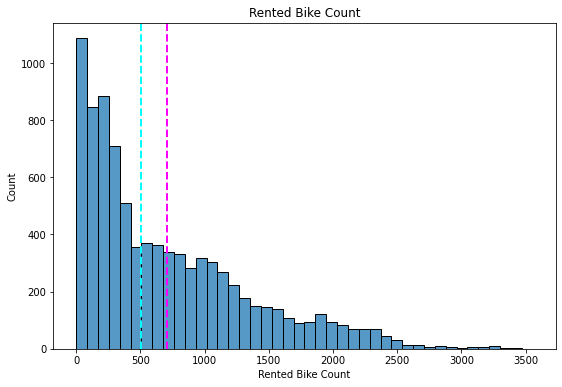

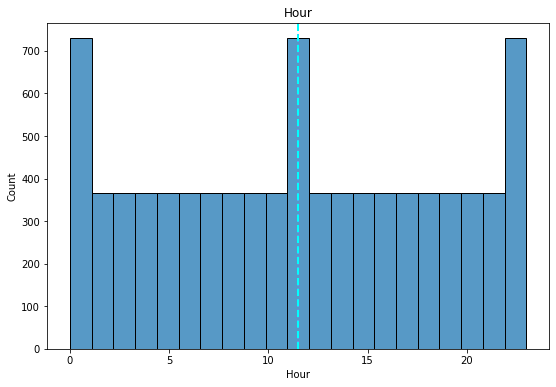

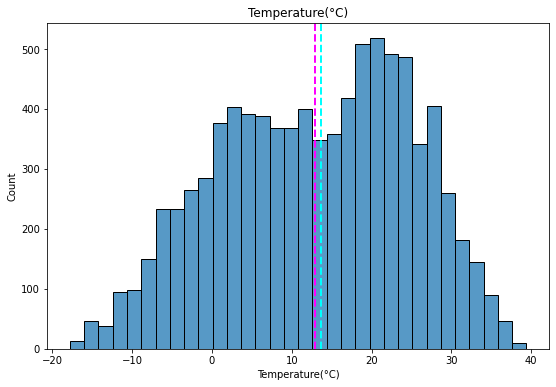

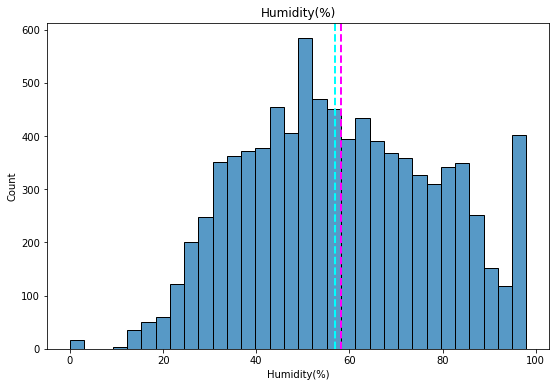

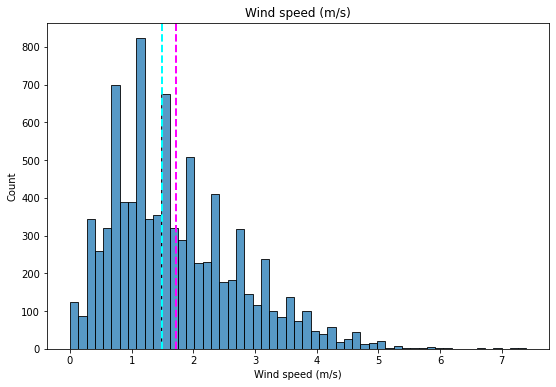

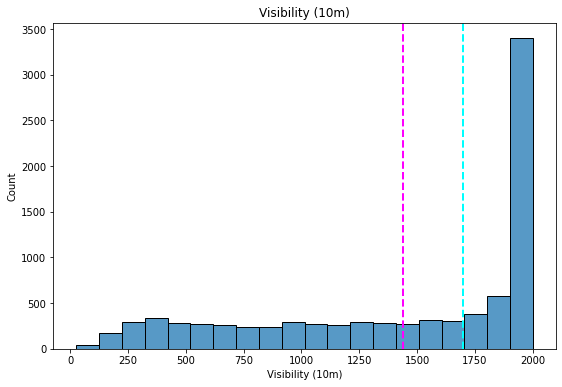

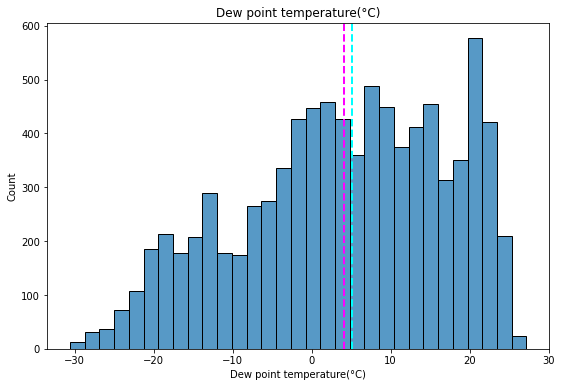

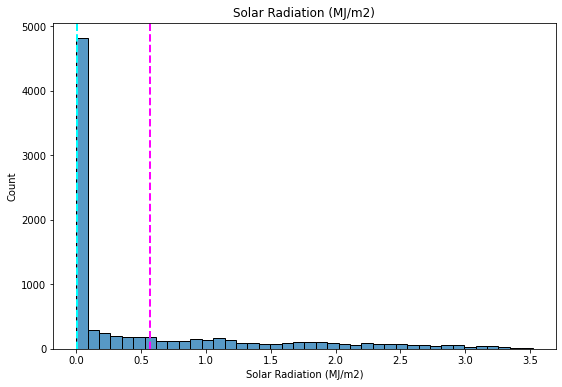

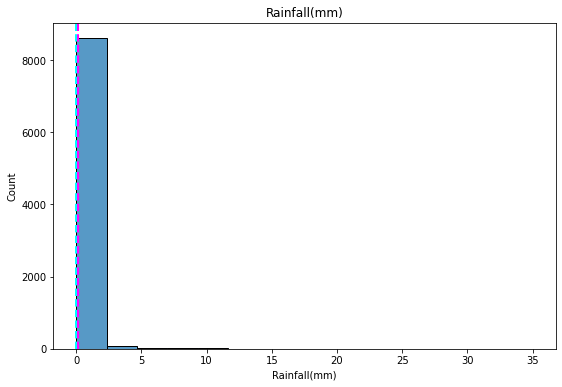

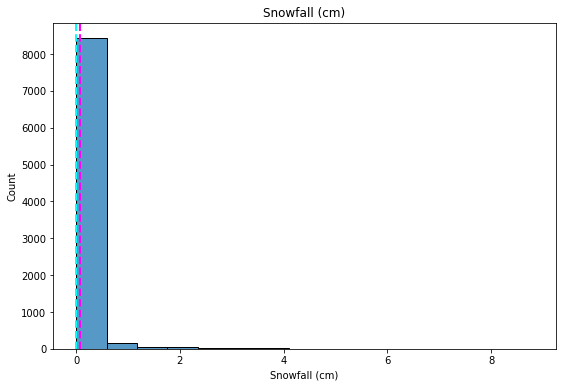

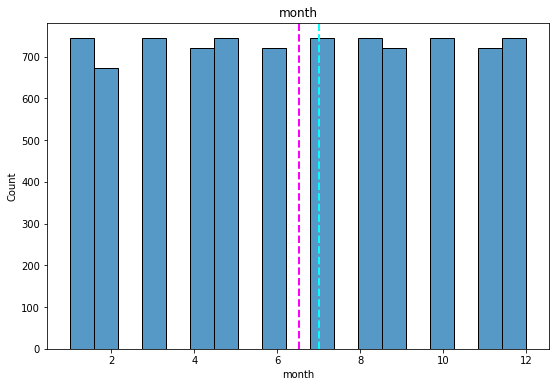

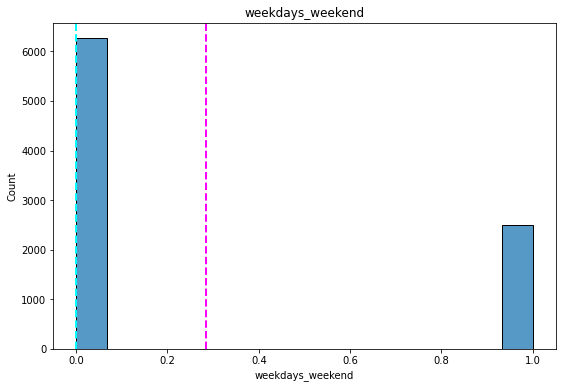

In [186]:
for col in numeric_features[0:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = ds[col]
  sns.histplot(feature)
    #feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()



here visibility is left skewed and solar radiation is right skewed. need to deal with out-lires.

#Visual analysis of categorical features

In [187]:
categorical_features = ds.describe(include=['object']).columns

In [188]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

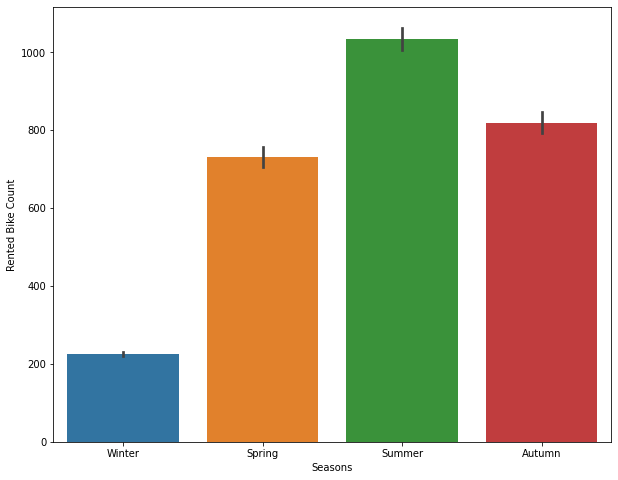

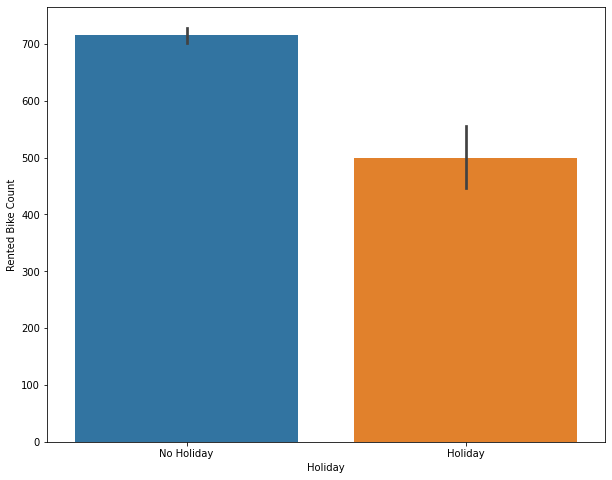

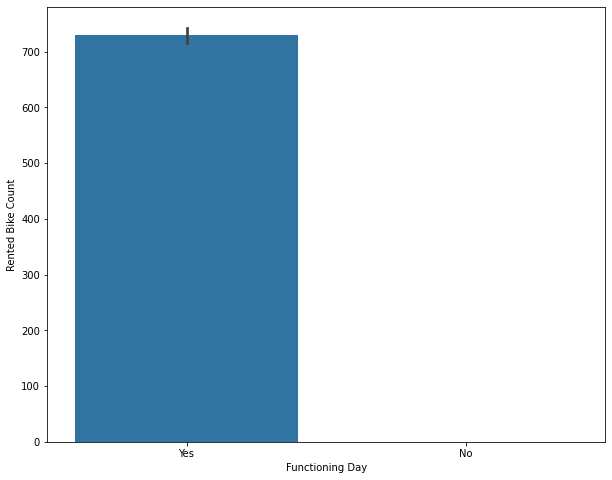

In [189]:
#graphical representation of categorical features
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=ds[col],y=ds["Rented Bike Count"])
  plt.show()

* According to bargraph, During winter season demand of rental bike is lesser in comparision to other seasons.
* On working day, the rental bikes demand is high in comparison to holiday.
* Very high demand of rentel bikes on functioning day, on the otherhand, no demand on non functioning day.

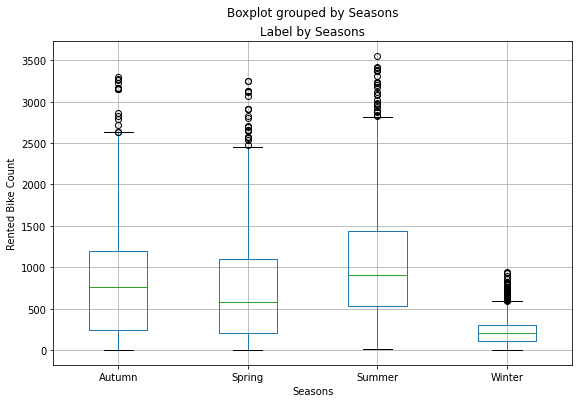

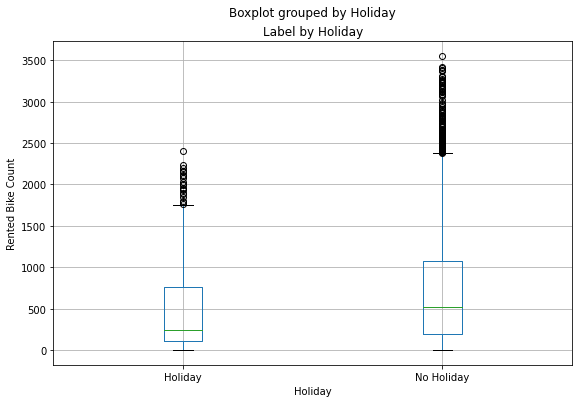

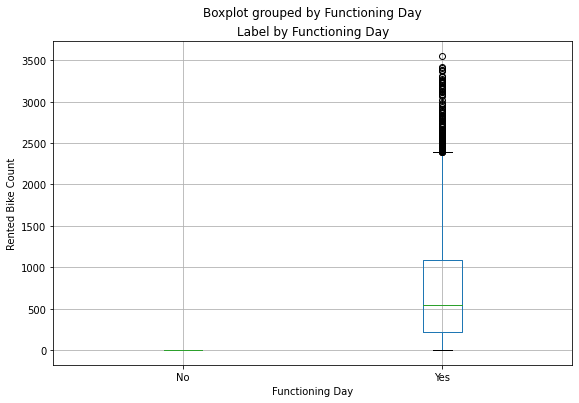

In [190]:
#checking for outliers
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    ds.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [191]:
ds.groupby(['Seasons'])['Rented Bike Count'].count()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Rented Bike Count, dtype: int64

In [192]:
len(ds.loc[ds['Rented Bike Count']==0])

295

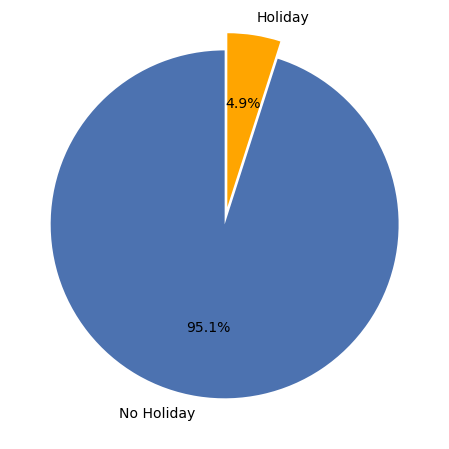

In [193]:
#Defining figure size
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = ds['Holiday'].value_counts().index.tolist()

# Convert value counts to list
sizes = ds['Holiday'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

* According to the pie chart, 95.1% of the data represent working day and only 4.9% of the data represent holiday.

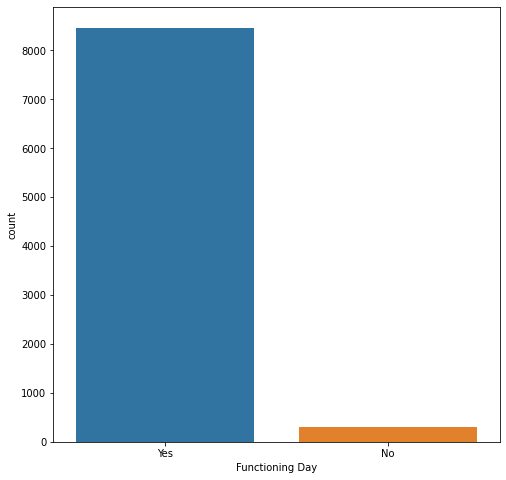

In [194]:
# Count plot for Functioning day 
sns.countplot(ds['Functioning Day']) 

In [195]:
len(ds.loc[ds['Rented Bike Count']>0])

8465

#Bivariate analysis

Text(0.5, 1.0, 'Relation between Temperature and Rental Bike Count')

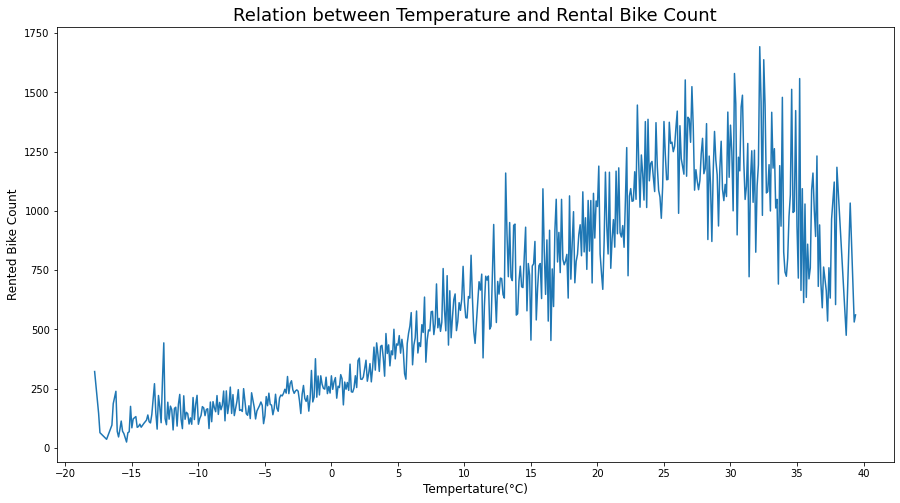

In [196]:
#Visual relationship between temperature and rented bike count
ds_t=ds.groupby('Temperature(°C)').agg({'Rented Bike Count':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 15,8
sns.lineplot(ds_t['Temperature(°C)'],ds_t['Rented Bike Count'])
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel('Tempertature(°C)',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count',fontsize=18)

* From the above line chart we can infer that, there is highest demand for the rented bike when temperature is around 25°C to 35°C.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

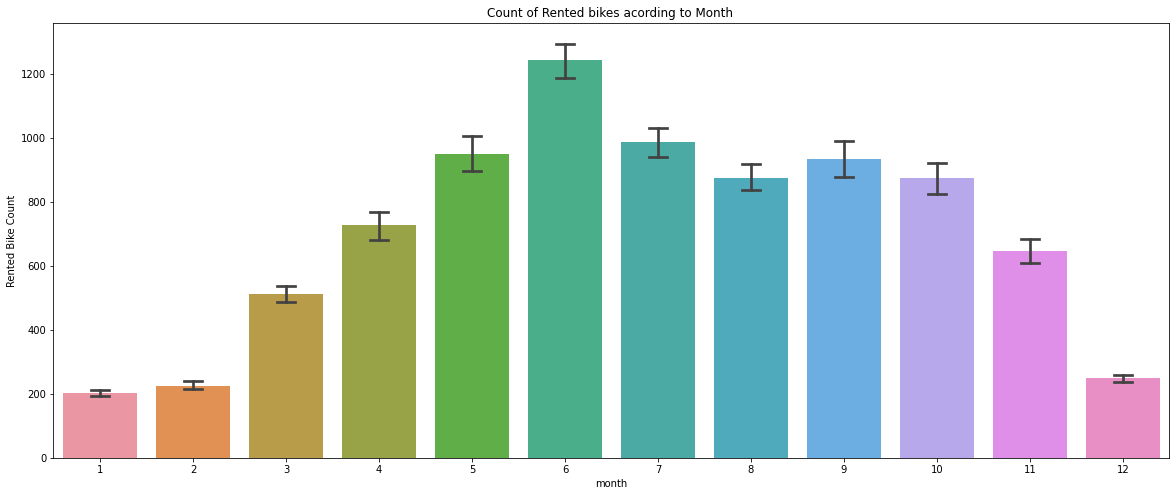

In [197]:
#monthwise bike count vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=ds,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* From the above bar plot we can clearly say that in month of June, there is high demand for rental bikes. 
* The least demand of rented bikes is seen in the months of January and February.

[Text(0.5, 1.0, 'Count of Rented bikes per Hour of a day')]

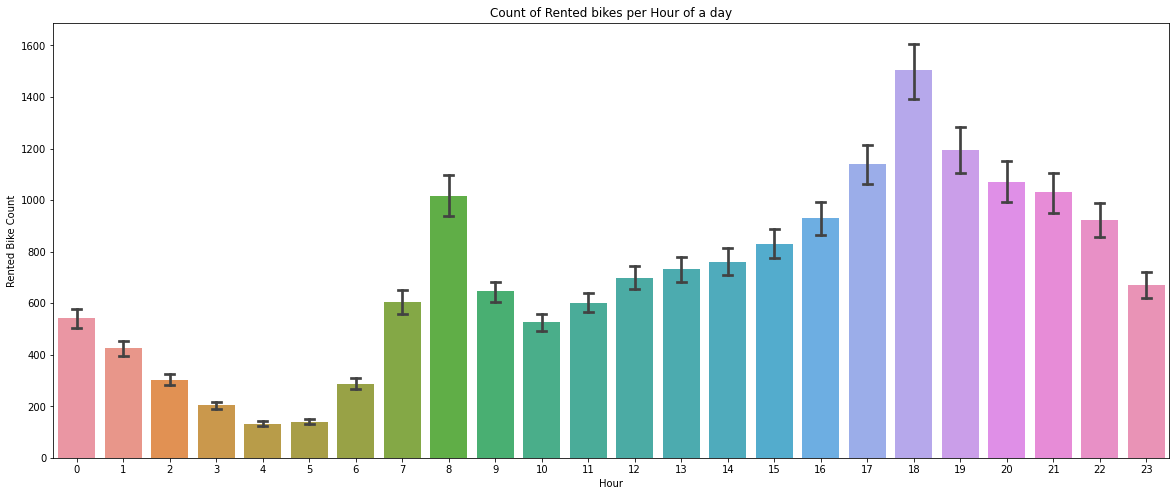

In [198]:
#hourly bikecount vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=ds,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes per Hour of a day')

* In the above plot , it can be seen that generally people use rented bikes during their working hour, i.e. from 7am to 9am and 5pm to 7pm.

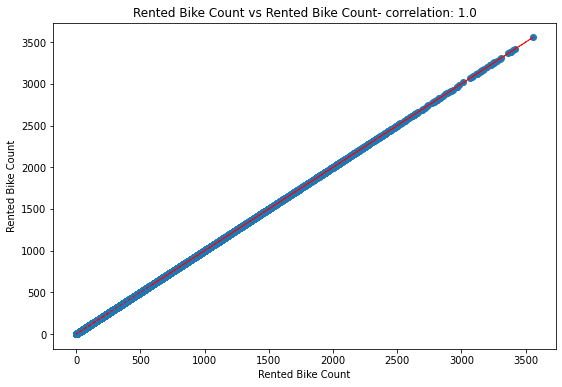

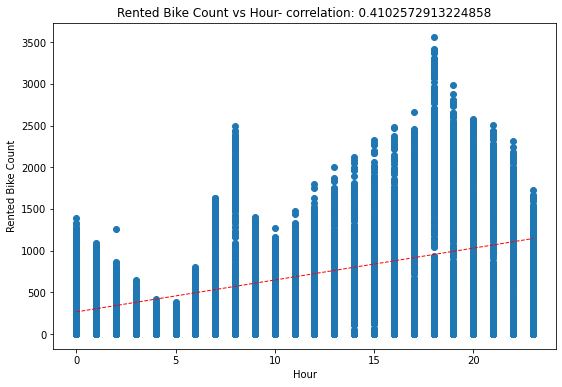

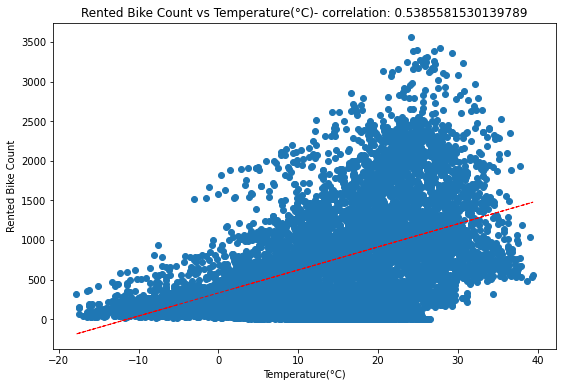

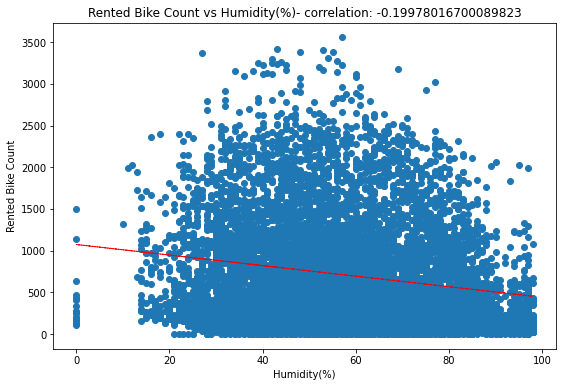

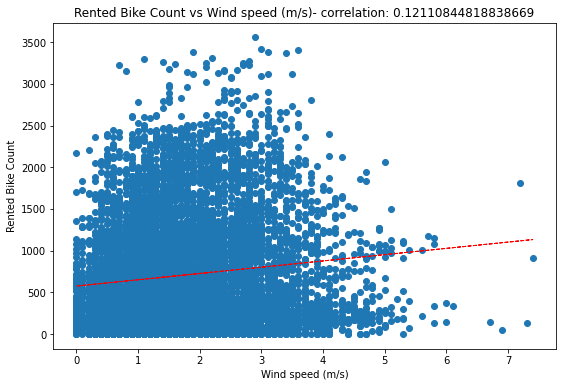

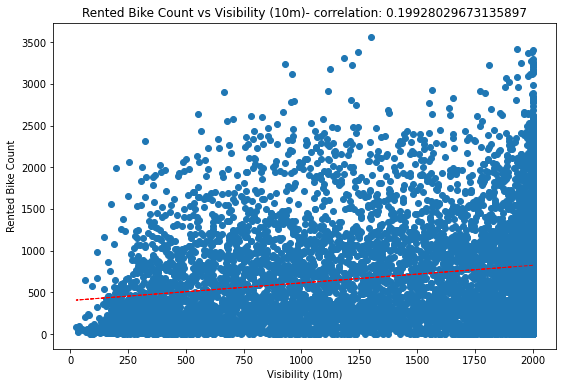

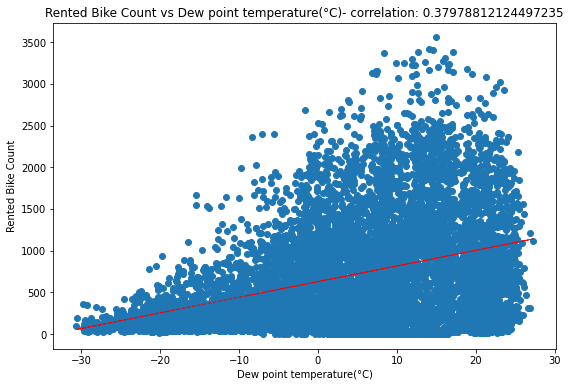

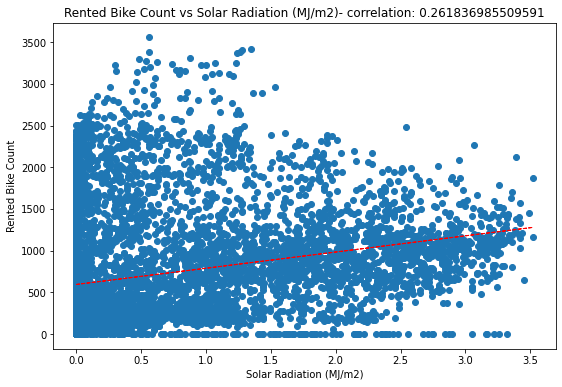

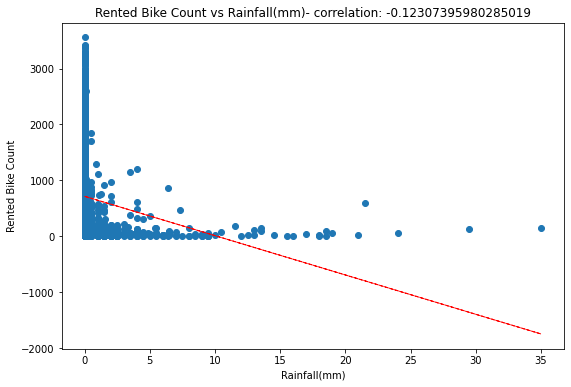

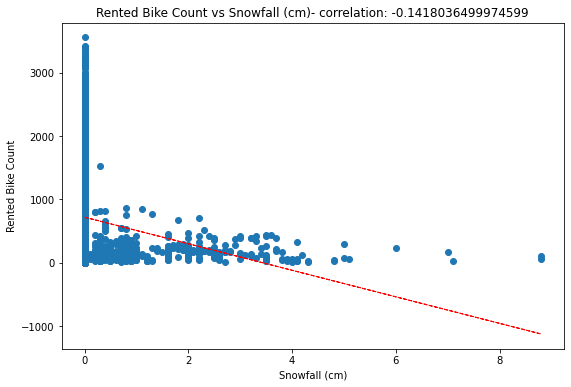

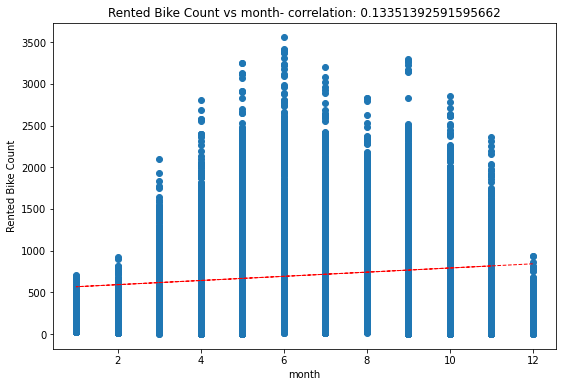

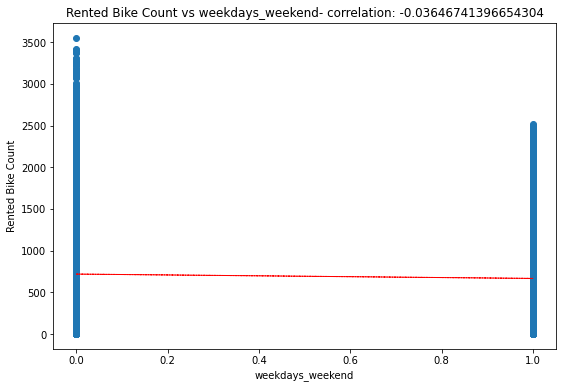

In [199]:
#finding correlation of bike count with other features
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = ds[col]
    label = ds['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(ds[col], ds['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(ds[col])

    plt.plot(ds[col], y_hat, "r--", lw=1)

plt.show()

* According to regression plot and joint plot between Rented Bike Count and Temperature, High temperature leads to high the Rented Bike Count per hour

* Rented bike count is negatively correlated with snow fall and rainfall.

#Checking for multicollinearity

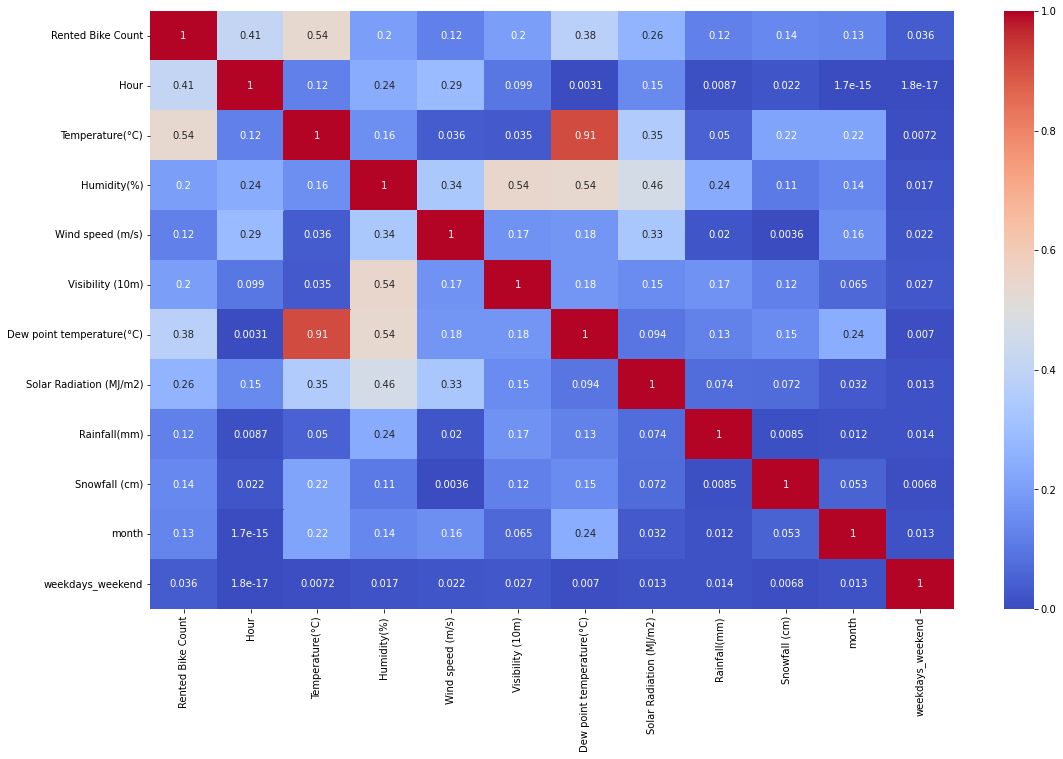

In [200]:
#correlation in a glance
plt.figure(figsize=(18,11))
correlation = ds.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

*from the heatmap we can say Dew point temperature and Temperature are highly correlated

In [201]:
ds.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

#Feature Engineering part-2

In [202]:
#ds['adj_temp'] = 0.6*ds['Temperature(°C)']+0.4*ds['Dew point temperature(°C)']

In [203]:
#dropping both humidity for VIF and dew point temp because of collinearity with temperature
ds = ds.drop(['Humidity(%)','Dew point temperature(°C)'],axis=1)

In [204]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [205]:
calc_vif(ds[[i for i in ds.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,3.929274
1,Temperature(°C),2.794584
2,Wind speed (m/s),4.281113
3,Visibility (10m),5.280633
4,Solar Radiation (MJ/m2),1.912107
5,Rainfall(mm),1.046907
6,Snowfall (cm),1.094804
7,month,4.082794
8,weekdays_weekend,1.353591


In [206]:
ds.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'month', 'weekdays_weekend'],
      dtype='object')

In [207]:
ds['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [208]:
ds['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [209]:
# converting all categorical/object values to numeric before going through regression process
#label encoding
encoders_nums = {
                 "Holiday":{"No Holiday":1,"Holiday":0},
                 "Functioning Day":{"Yes": 1, "No": 0},
                 }

dataset_pr = ds.replace(encoders_nums)


In [210]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["Seasons"], prefix=["seas"],drop_first=True)

In [211]:
dataset_pr

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekdays_weekend,seas_Spring,seas_Summer,seas_Winter
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,1,1,12,0,0,0,1
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,1,1,12,0,0,0,1
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,1,1,12,0,0,0,1
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,1,1,12,0,0,0,1
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,1,1,12,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,0.0,1,1,11,0,0,0,0
8756,764,20,3.4,2.3,2000,0.0,0.0,0.0,1,1,11,0,0,0,0
8757,694,21,2.6,0.3,1968,0.0,0.0,0.0,1,1,11,0,0,0,0
8758,712,22,2.1,1.0,1859,0.0,0.0,0.0,1,1,11,0,0,0,0


In [212]:
dataset_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  month                    8760 non-null   int64  
 11  weekdays_weekend         8760 non-null   int64  
 12  seas_Spring              8760 non-null   uint8  
 13  seas_Summer              8760 non-null   uint8  
 14  seas_Winter             

Now all are numeric features

In [213]:
dataset_pr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80
Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00


#Train Test Split

In [214]:
X=dataset_pr.drop(['Rented Bike Count'],axis=1)

In [215]:
y=np.sqrt(dataset_pr['Rented Bike Count'])

In [216]:
#dividing dataset into traing and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


#Regression Models

#(i) Linear Regression

In [217]:
#training of dataset
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [218]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [219]:
#predicing values
y_pred =lr.predict(X_test)

MSE : 189451.46878456997
RMSE : 435.260231108437
R2 : 0.5473327509412758
Adjusted R2 :  0.543684310246502


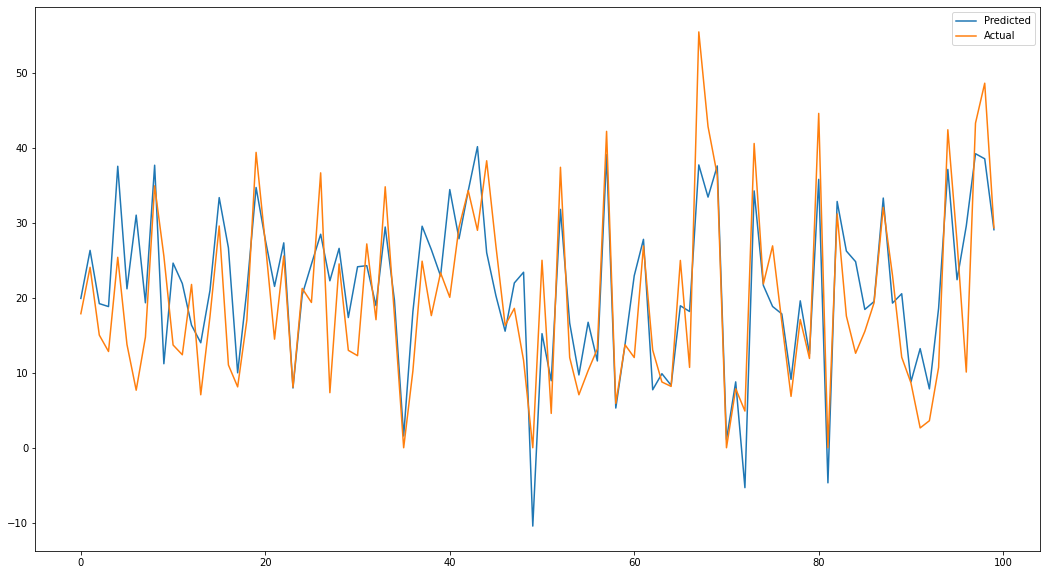

In [220]:
from sklearn.metrics import mean_squared_error

#creating list of matrix to store the results of all regression models
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for linear regression
plt.figure(figsize=(18,10))
plt.plot((y_pred)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)


#(ii) Lasso Regression

In [221]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [222]:
#checking training accuracy
lasso.score(X_train, y_train)

0.6294853605539161

In [223]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [224]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -57.50893352734339


In [225]:
y_pred_lasso = lasso_regressor.predict(X_test)

MSE : 189481.8183158983
RMSE : 435.2950933744812
R2 : 0.5472602350671854
Adjusted R2 :  0.543611209903651


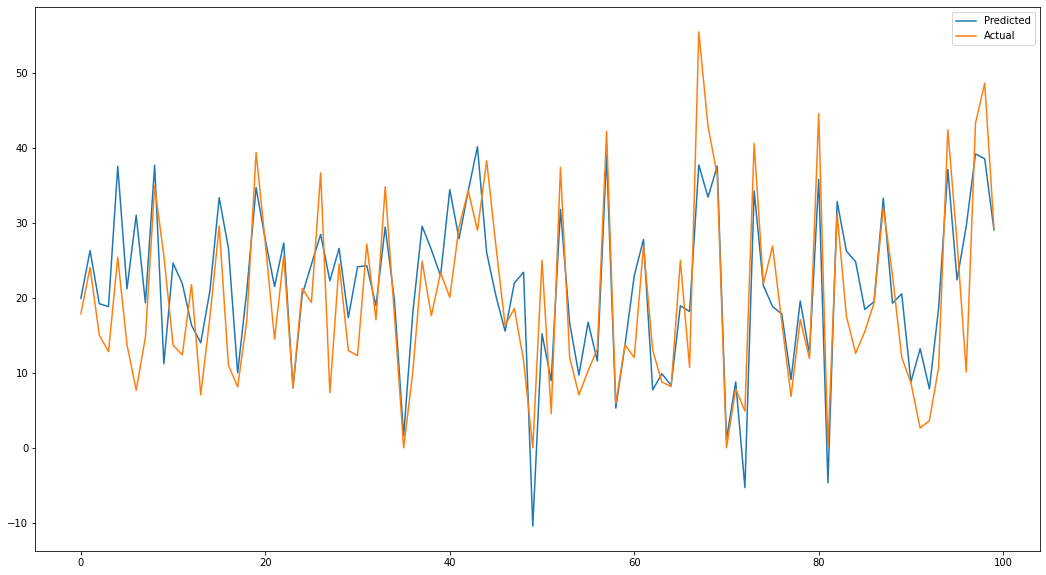

In [226]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred_lasso)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for lasso regression
plt.figure(figsize=(18,10))
plt.plot((y_pred_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)


#(iii) Ridge Regression

In [227]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [228]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -57.459357712780694


In [229]:
y_pred_ridge = ridge_regressor.predict(X_test)

MSE : 189582.25454382531
RMSE : 435.4104437698128
R2 : 0.5470202570332687
Adjusted R2 :  0.5433692976771753


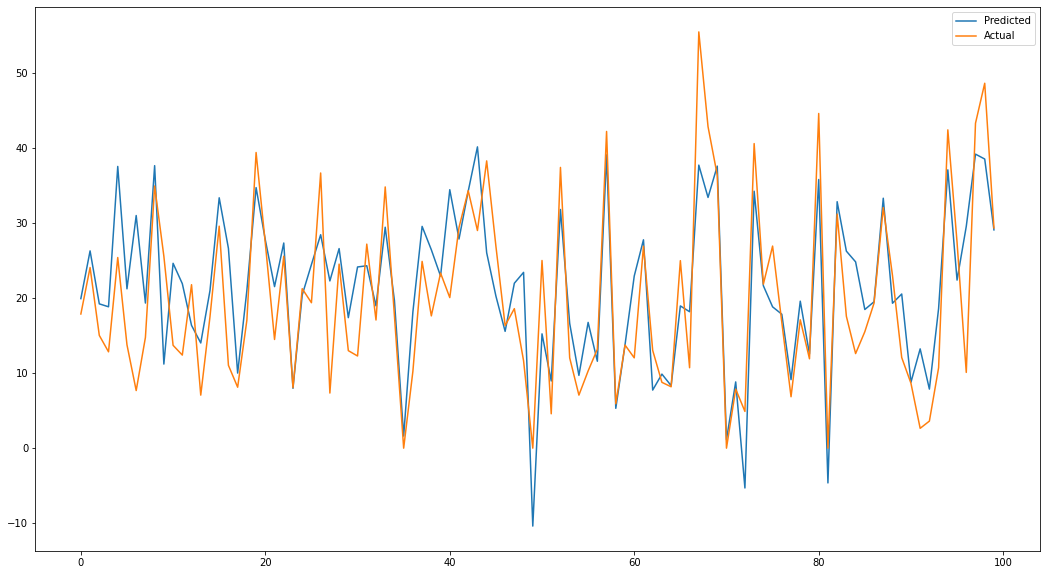

In [230]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for ridge regression
plt.figure(figsize=(18,10))
plt.plot((y_pred_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)


#(iv) ElasticNet Regression

In [231]:
from sklearn.linear_model import ElasticNet

In [232]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [233]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -57.50844354179632


In [234]:
y_pred_elastic = elastic_regressor.predict(X_test)

MSE : 189522.05617790326
RMSE : 435.3413099832168
R2 : 0.5471640924380539
Adjusted R2 :  0.5435142923771056


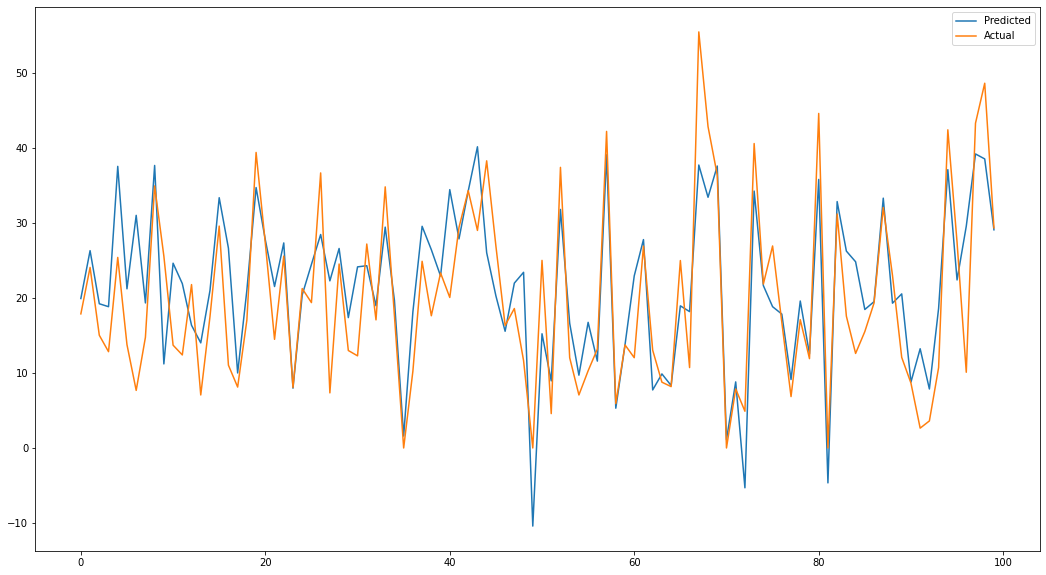

In [235]:
MSE  = mean_squared_error((y_test)**2, (y_pred_elastic)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred_elastic)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for ElasticNet regression
plt.figure(figsize=(18,10))
plt.plot((y_pred_elastic)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)


#(v) DecisionTree Regression

In [236]:
from sklearn.tree import DecisionTreeRegressor

In [237]:
dt_model = DecisionTreeRegressor()

In [238]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [239]:
y_pred_dt = dt_model.predict(X_test)

MSE : 63338.66552511416
RMSE : 251.67174161020571
R2 : 0.8486612974486517
Adjusted R2 :  0.8474415266739144


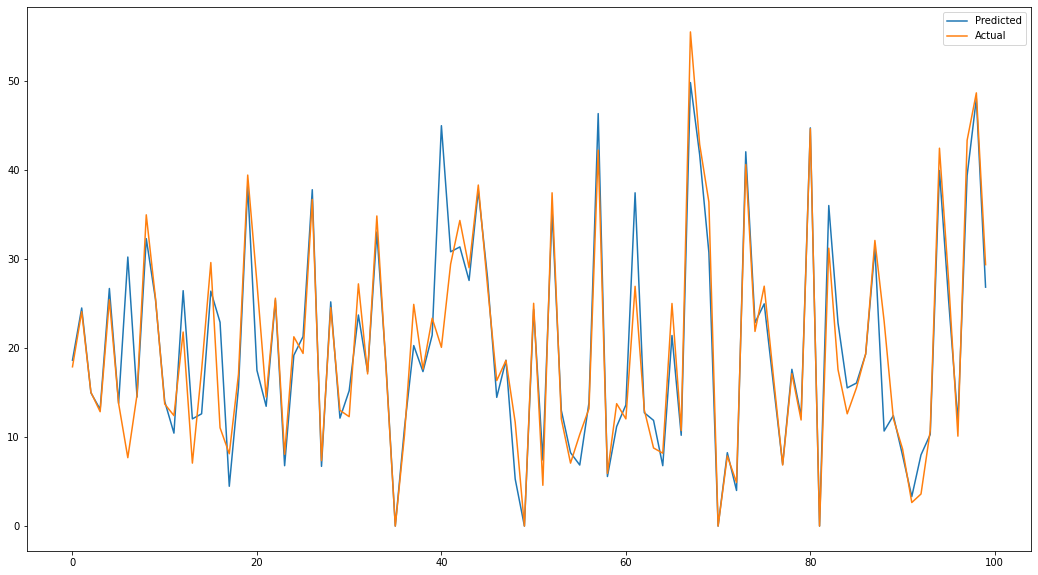

In [240]:
MSE  = mean_squared_error((y_test)**2, (y_pred_dt)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_dt)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred_dt)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for decision tree regression
plt.figure(figsize=(18,10))
plt.plot((y_pred_dt)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

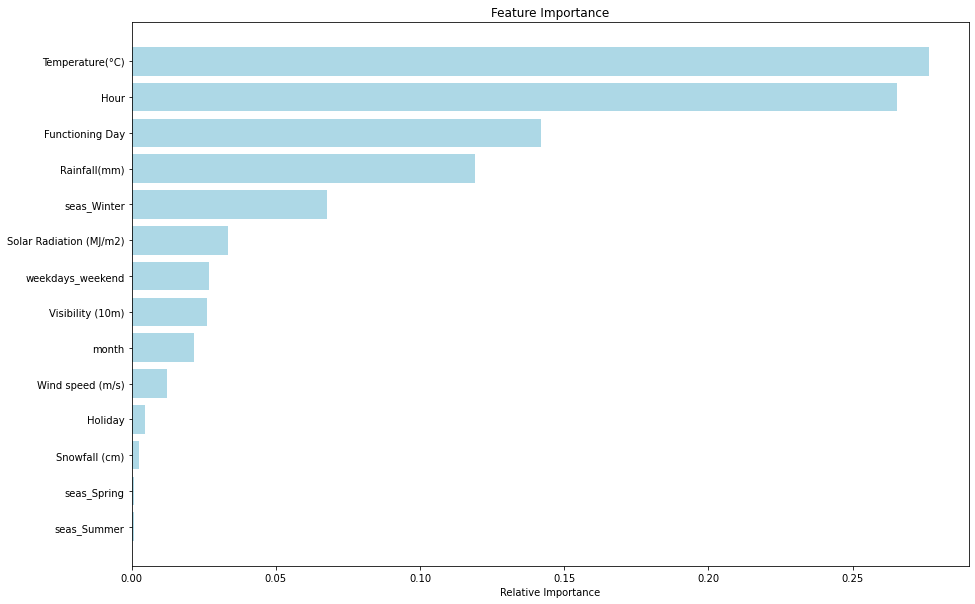

In [241]:
#feature importance
features = X.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Here we can see that **Temperature** has the highest feature importance in case of decision tree regression

#(vi) XGBoost Regression

In [242]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [243]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [244]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [245]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [246]:
 # Fit Model
xgb_grid.fit(X_train,y_train)

[13:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [247]:
y_pred_xg = xgb_grid.predict(X_test)

MSE : 30342.243146340963
RMSE : 174.1902498601485
R2 : 0.9275015399804398
Adjusted R2 :  0.9269172115749857


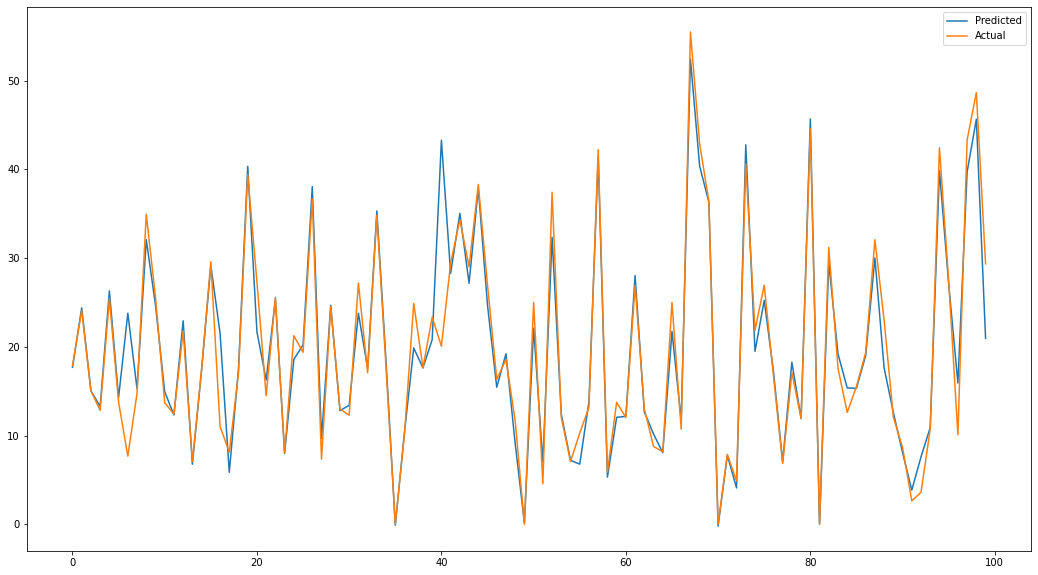

In [248]:
MSE  = mean_squared_error((y_test)**2, (y_pred_xg)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_xg)**2)
print("R2 :" ,r2)
adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred_xg)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

#plot for XGBoost regression
plt.figure(figsize=(18,10))
plt.plot((y_pred_xg)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#appending metrice to list
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

In [249]:
# getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

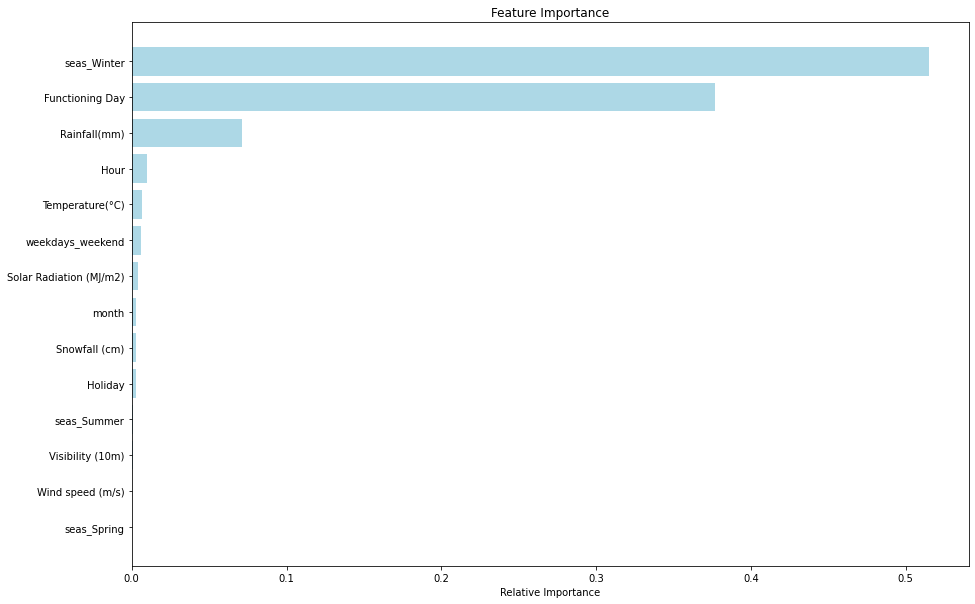

In [250]:
#feature importance
features = X.columns
importances = optimal_xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Here we can see that **winter season** has the highest feature importance in case of XGBoosting 

#Resultant analysis of all the regression models, at a glance

In [251]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [252]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Xtreme_GB']

In [253]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [254]:
matrices_df.transpose()

,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
Linear,189451.468785,435.260231,0.547333,0.543684
Lasso,189481.818316,435.295093,0.547260,0.543611
Ridge,189582.254544,435.410444,0.547020,0.543369
Elasticnet,189522.056178,435.341310,0.547164,0.543514
Decision_Tree,63338.665525,251.671742,0.848661,0.847442
Xtreme_GB,30342.243146,174.190250,0.927502,0.926917


##Conclusion - EDA

* The  highest demand for rental bikes was noted in June.
* The least demand of rented bikes is seen in the months of January and February.
* Rented bike demand is less during winter season, in comparison to other seasons . 
* On working day, the rental bike demand is high in comparison to holiday
* highest demand for the rented bike is seen when there is moderate
temperature that is around 25°C to 35°C.

# Conclusion - Regression Model

* According to Decision tree  temperature has the highest feature importance and highest impact on rented bike demand.
* As per eXtreme Gradient Boosting model, winter season has the highest feature importance.
* On the basis of R2 and Adjusted-R2, eXtreme Gradient Boosting model has best as the accuracy as this model has accuracy above 90% and its Adjusted-R2 value is less than R2 values. 
* Descision Tree model's R2 and Adjusted-R2 values are 0.848 and 0.847 respectively. 
* eXtreme Gradient Boosting model's R2 and Adjusted-R2 values are 0.927 and 0.926 respectively. 
* Linear model, Lasso model, Ridge model, and Elasticnet model have Adjusted-R2 value below 60%.